# Mustererkennung/Machine Learning - Assignment 9

### Load the spam dataset:

In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random
from tqdm import tqdm

In [62]:
def to_one_hot(y, num_classes):
    return np.eye(num_classes)[y.astype(np.uint)]

num_classes = 10

path_to_train = 'zip.train'
path_to_test = 'zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True, stratify=y)

y_train, y_test = to_one_hot(y_train, num_classes), to_one_hot(y_test, num_classes)

In [65]:
def softmax(x):
    exp = np.exp(x)
    summed = np.sum(exp, axis=1, keepdims=True)
    return exp / summed

class Sigmoid():
    def forward(self, x):
        x = np.clip(x, -500, 500)
        z = 1.0 / (1.0 + np.exp(-x))
        self.z = z
        return z
    
    def backward(self):
        return (self.z / (1.0 - self.z)) * right_dev
    
class CategoricalCrossEntropy():
    """
    Softmax + CategoricalCrossentropy
    """
    def forward(self, x, y):
        y_pred = softmax(x)
        loss = (1.0 / x.shape[0]) * np.sum(y_pred * y)
        self.y_pred = y_pred
        self.y_true = y
        return loss
        
    def backward(self, right_dev):
        return (self.y_pred - self.y_true) * right_dev
    
class DenseLayer():
    def __init__(self, input_dims, output_dims, activation=None):
        w = np.random.normal(size=(input_dims, output_dims))
        bias = np.ones((1, output_dims))
        self.w = np.vstack((w, bias))
        self.activation = activation
        
    def forward(self, x):
        x = np.hstack((x, np.ones((x.shape[0], 1))))
        self.x = x
        x = x @ self.w
        if self.activation:
            x = self.activation.forward(x)
        return x
    
    def backward(self, right_dev):
        pass
    
    def apply_gradients(self, lr):
        pass
    
class NeuralNetwork():
    def __init__(self, layers, loss):
        self.layers = layers
        self.loss = loss
        
    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def predict(self, x):
        return softmax(self.forward(x))
    
    def fit(self, x, y, epochs, lr):
        losses = []
        for epoch in tqdm(range(1, epochs + 1)):
            y_pred = self.forward(x)
            loss = self.loss.forward(y_pred, y)
            losses.append(loss)
            right_dev = 1.0
            right_dev = self.loss.backward(right_dev)
            for layer in self.layers:
                right_dev = layer.backward(right_dev)
        return losses

layers = [
    DenseLayer(X_train.shape[1], 20, activation=Sigmoid()),
    DenseLayer(20, 30, activation=Sigmoid()),
    DenseLayer(30, 30, activation=Sigmoid()),
    DenseLayer(30, 10)
]

clf = NeuralNetwork(layers, CategoricalCrossEntropy())

y_pred = clf.predict(X_test)
print(y_pred.shape)

(1151, 10)


In [67]:
losses = clf.fit(X_train, y_train, epochs=30, lr=0.01)

100%|██████████| 30/30 [00:00<00:00, 134.97it/s]


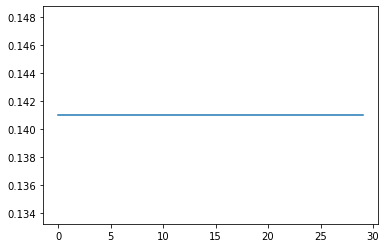

In [68]:
plt.plot(list(range(len(losses))), losses)